In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
import numpy as np
import hist
import pandas as pd
import uproot
import json
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep
from scipy import stats

In [2]:
fileset = {
    "flatZprime": [
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_0.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_100.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_101.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_102.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_103.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_104.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_105.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_106.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_107.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_108.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_109.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_10.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_110.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_111.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_112.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_113.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_114.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_115.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_116.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_117.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_118.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_119.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_11.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_120.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_121.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_122.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_123.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_124.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_125.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_126.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_127.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_128.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_129.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_12.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_130.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_131.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_132.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_133.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_134.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_135.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_136.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_137.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_138.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_139.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_13.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_140.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_141.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_142.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_143.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_144.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_145.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_146.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_147.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_148.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_149.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_14.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_150.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_151.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_152.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_153.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_154.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_155.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_156.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_157.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_158.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_159.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_15.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_160.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_161.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_162.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_163.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_164.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_165.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_166.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_167.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_168.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_169.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_16.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_170.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_171.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_172.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_173.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_174.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_175.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_176.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_177.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_178.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_179.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_17.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_180.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_181.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_182.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_183.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_184.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_185.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_186.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_187.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_18.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_19.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_1.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_20.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_21.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_22.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_23.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_24.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_25.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_26.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_27.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_28.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_29.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_2.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_30.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_31.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_32.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_33.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_34.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_35.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_36.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_37.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_38.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_39.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_3.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_40.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_41.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_42.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_43.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_44.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_45.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_46.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_47.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_48.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_49.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_4.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_50.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_51.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_52.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_53.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_54.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_55.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_56.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_57.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_58.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_59.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_5.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_60.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_61.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_62.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_63.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_64.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_65.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_66.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_67.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_68.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_69.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_6.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_70.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_71.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_72.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_73.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_74.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_75.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_76.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_77.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_78.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_79.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_7.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_80.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_81.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_82.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_83.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_84.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_85.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_86.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_87.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_88.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_89.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_8.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_90.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_91.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_92.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_93.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_94.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_95.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_96.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_97.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_98.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_99.root",
        "/cms/akobert/NanoToolOutput/UL/flat/jetToolbox_nano_mc_2018_flat_9.root"
    ],
}

In [3]:
import warnings
warnings.filterwarnings("ignore", "Found duplicate branch")

ds = "flatZprime"
fn = fileset[ds][0]
events = NanoEventsFactory.from_root(fn, metadata={"dataset": ds}, entry_stop=100000).events()

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  RuntimeWarnin

In [4]:
from coffea import processor
from correctionlib import CorrectionSet


class MSDProc(processor.ProcessorABC):
    def __init__(self):
        self.corrs = CorrectionSet.from_file("msdcorr.json")

    def process(self, events):
        zprime = events.GenPart[
            (events.GenPart.pdgId == 55)
            & events.GenPart.hasFlags("fromHardProcess", "isLastCopy")
        ][:, 0]
        zprime["flavor"] = abs(zprime.children[:, 0].pdgId)
        zprime["qcdrho"] = 2 * np.log(zprime.mass / zprime.pt)
        zprime["jet"] = ak.with_name(ak.firsts(
            events.selectedPatJetsAK8PFPuppi[
                ak.argmin(zprime.delta_r2(events.selectedPatJetsAK8PFPuppi), axis=1, keepdims=True)
            ]
        ), name="PtEtaPhiMLorentzVector")
        zprime["jet", "msdraw"] = zprime.jet.softdropMass
        
        
        zprime["jet", "msoftdrop"] = zprime.jet.msoftdrop_raw * zprime.jet.corr_JER #Apply JER correction
        
        zprime["jet", "msdfjcorr"] = zprime.jet.msoftdrop_nom

        zprime = zprime[~ak.is_none(zprime.jet)]
        out = {}

        match = zprime.jet.delta_r(zprime) < 0.4
        altmatch = ak.all(zprime.jet.delta_r(zprime.children) < 0.8, axis=1)
        altmatch = altmatch & ak.all(zprime.children.pt > 0.1 * zprime.pt, axis=1)
        out["match"] = (
            hist.Hist.new
            .IntCat([0, 1])
            .IntCat([0, 1])
            .Reg(8, 0, 1536, name="pt", label=r"Z' $p_T$")
            .Reg(8, 0, 512, name="mass", label=r"Z' mass")
            .Double().fill(match, altmatch, zprime.pt, zprime.mass)
        )
        zprime = zprime[altmatch]

        out["kin"] = (
            hist.Hist.new.Reg(64, 0, 1536, name="pt", label=r"Z' $p_T$")
            .Reg(64, 0, 512, name="mass", label=r"Z' mass")
            .Reg(32, -3, 3, name="eta", label=r"Z' $\eta$")
            .Double()
            .fill(pt=zprime.pt, mass=zprime.mass, eta=zprime.eta)
        )
        out["jetkin"] = (
            hist.Hist.new.Reg(64, 0, 1536, name="pt", label=r"Jet $p_T$")
            .Reg(64, 0, 512, name="mass", label=r"Jet mass")
            .Reg(32, -3, 3, name="eta", label=r"Jet $\eta$")
            .Double()
            .fill(pt=zprime.jet.pt_nom, mass=zprime.jet.msoftdrop_nom, eta=zprime.jet.eta)
        )

        out["msd_qcdrho"] = (
            hist.Hist.new.Var([1, 4, 5, 6], name="flavor", flow=False)
            .Reg(32, -8, 0, name="qcdrho", label=r"Z' $\rho=2ln(m/p_T)$")
            .Reg(32, 0, 2, name="msdratio", label="Jet $m_{SD}$ / Z' mass")
            .Double()
            .fill(
                flavor=zprime.flavor,
                qcdrho=2 * np.log(zprime.mass / zprime.pt),
                msdratio=zprime.jet.msoftdrop_nom/ zprime.mass,
            )
        )

#        zprime = zprime[zprime.mass / zprime.pt < 0.4]

        for mname in ["msdraw", "msdfjcorr", "msoftdrop"]:
            out[mname] = {
                "mean": (
                    hist.Hist.new.Var([1, 4, 5, 6], name="flavor", flow=False)
                    .Reg(48, 110, 750, name="pt", label=r"Jet $p_T$")
                    .Reg(48, 5, 200, name="mass", label=r"Z' mass")
                    .Reg(48, -2.4, 2.4, name="eta", label=r"Jet $\eta$")
                    .Reg(4, 0, 2, name="msdratio", label="Jet $m_{SD}$ / Z' mass")
                    .Mean()
                    .fill(
                        flavor=zprime.flavor,
                        pt=zprime.jet.pt_nom,
                        mass=zprime.mass,
                        eta=zprime.jet.eta,
                        msdratio=zprime.jet[mname] / zprime.mass,
                        sample=zprime.jet[mname],
                    )
                ),
                "massmean": (
                    hist.Hist.new.Var([1, 4, 5, 6], name="flavor", flow=False)
                    .Reg(48, 110, 750, name="pt", label=r"Jet $p_T$")
                    .Reg(48, 5, 200, name="mass", label=r"Z' mass")
                    .Reg(48, -2.4, 2.4, name="eta", label=r"Jet $\eta$")
                    .Reg(4, 0, 2, name="msdratio", label="Jet $m_{SD}$ / Z' mass")
                    .Mean()
                    .fill(
                        flavor=zprime.flavor,
                        pt=zprime.jet.pt_nom,
                        mass=zprime.mass,
                        eta=zprime.jet.eta,
                        msdratio=zprime.jet[mname] / zprime.mass,
                        sample=zprime.mass,
                    )
                ),
            }
            # closure check
            try:
                corr = self.corrs[mname]
                # corr = self.corrs[mname + "_onebin"]
            except (IndexError, KeyError):
                continue
            cvar = corr.evaluate(
                np.array(zprime.jet[mname] / zprime.jet.pt_nom),
                np.array(np.log(zprime.jet.pt_nom)),
                np.array(zprime.jet.eta),
            )
            out[mname]["cmean"] = (
                hist.Hist.new.Var([1, 4, 5, 6], name="flavor", flow=False)
                .Reg(48, 110, 750, name="pt", label=r"Jet $p_T$")
                .Reg(48, 5, 200, name="mass", label=r"Z' mass")
                .Reg(48, -2.4, 2.4, name="eta", label=r"Jet $\eta$")
                .Reg(4, 0, 2, name="msdratio", label="Jet $m_{SD}$ / Z' mass")
                .Mean()
                .fill(
                    flavor=zprime.flavor,
                    pt=zprime.jet.pt_nom,
                    mass=zprime.mass,
                    eta=zprime.jet.eta,
                    msdratio=zprime.jet[mname] * cvar / zprime.mass, # Note: using corrected for window
                    sample=zprime.jet[mname] * cvar,
                )
            )
        return out

    def postprocess(self, x):
        return x

In [5]:
out = MSDProc().process(events)

In [6]:
runner = processor.Runner(
    processor.FuturesExecutor(workers=4),
    schema=NanoAODSchema,
    # xrootdtimeout=120,
)
out = runner(fileset, "Events", MSDProc())

Output()

Output()

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  RuntimeWarnin

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for Jet_genJetIdx => GenJet
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for Jet_muonIdx1 => Muon
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for Jet_electronIdx2 => Electron
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for Jet_genJetIdx => GenJet
  RuntimeWarning,
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/coffea/nanoevents/schemas/nanoaod.py:202: RuntimeWarning: Missing cross-reference target for Jet_muonIdx1 => Muon
  RuntimeWarning,
/users/h2/akober

In [7]:
import coffea.util
coffea.util.save(out, "profiles.coffea")

In [8]:
m = out["match"][:, :, ::sum, ::sum].view()
m /= m.sum()
m

array([[4.90932369e-02, 1.04991134e-04],
       [4.56521627e-01, 4.94280145e-01]])

In [9]:
def splom(h):
    """Corner/splom plot

    https://github.com/scikit-hep/hist/issues/381
    """
    naxes = len(h.axes)
    fig, axes = plt.subplots(naxes, naxes, figsize=(4*naxes, 4*naxes), facecolor="w")
    for i, axrow in enumerate(axes):
        for j, ax in enumerate(axrow):
            if j > i:
                ax.axis("off")
            elif j == i:
                hp = h.project(h.axes[i].name)
                hp.plot(ax=ax)
                ax.set_xlim(hp.axes[0].edges[0], hp.axes[0].edges[-1])
            else:
                hp = h.project(h.axes[j].name, h.axes[i].name)
                hp.plot(ax=ax, cbar=False)
                ax.set_xlim(hp.axes[0].edges[0], hp.axes[0].edges[-1])
                ax.set_ylim(hp.axes[1].edges[0], hp.axes[1].edges[-1])

    fig.tight_layout()
    return fig

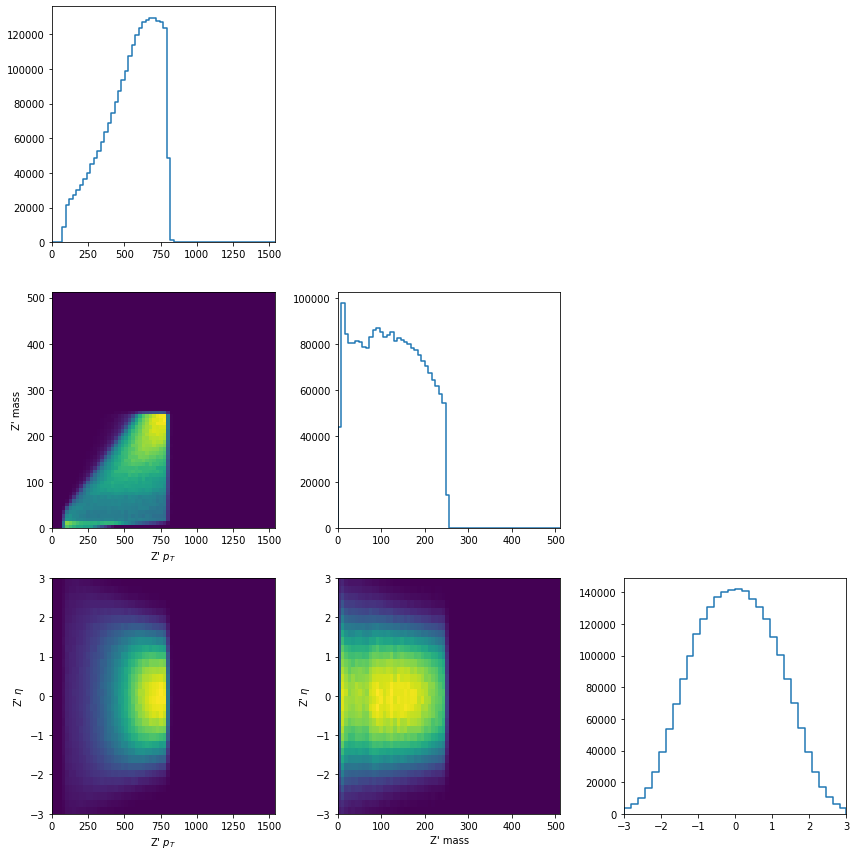

In [10]:
fig = splom(out["kin"])
fig.savefig("zprime_kinematics.pdf")

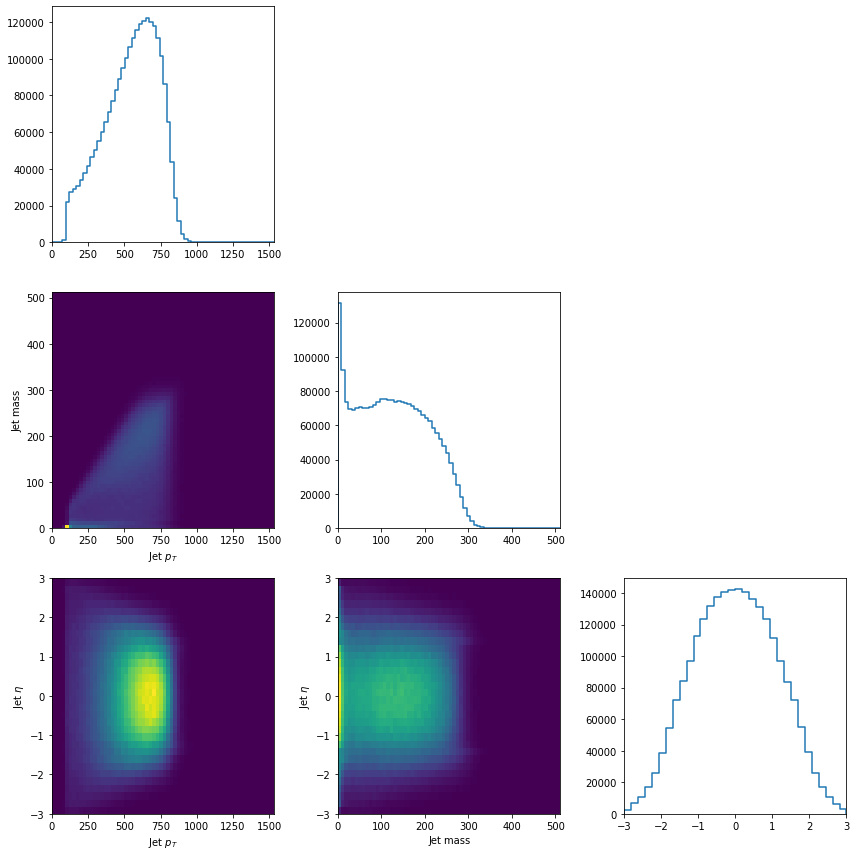

In [11]:
fig = splom(out["jetkin"])
fig.savefig("jet_kinematics.pdf")

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


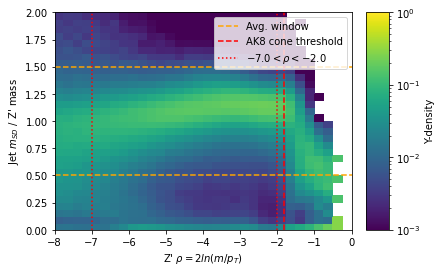

In [12]:
fig, ax = plt.subplots()

h = out["msd_qcdrho"][::sum, :, :]
H = h.counts()
h.view()[:] = H / H.sum(axis=1)[:, None]
art = h.plot(ax=ax, norm=LogNorm(vmin=1e-3, vmax=1))
art.cbar.set_label("Y-density")

window = slice(0.5j, 1.5j, sum)
ax.axhline(0.5, linestyle="--", color="orange", label="Avg. window")
ax.axhline(1.5, linestyle="--", color="orange")
ax.axvline(2*np.log(0.8/2), linestyle="--", color="red", label="AK8 cone threshold")
ax.axvline(-2.0, linestyle=":", color="red", label=r"$-7.0 < \rho < -2.0$")
ax.axvline(-7.0, linestyle=":", color="red")
ax.legend(loc="upper right")
fig.savefig("response_vs_rho.pdf")

In [13]:
from typing import List, Tuple
from scipy.optimize import lsq_linear
import correctionlib.schemav2 as clib


def ndpolyfit(
    points: List[np.ndarray],
    values: np.ndarray,
    weights: np.ndarray,
    varnames: List[str],
    degree: Tuple[int],
) -> clib.Formula:
    """Fit an n-dimensional polynomial to data points with weight

    Returns a correctionlib Formula node
    """
    if len(values.shape) != 1:
        raise ValueError("Expecting flat array of values")
    if not all(x.shape == values.shape for x in points):
        raise ValueError("Incompatible shapes for points and values")
    if values.shape != weights.shape:
        raise ValueError("Incompatible shapes for values and weights")
    if len(points) != len(varnames):
        raise ValueError("Dimension mismatch between points and varnames")
    if len(degree) != len(varnames):
        raise ValueError("Dimension mismatch between varnames and degree")
    if len(degree) > 4:
        raise NotImplementedError(
            "correctionlib Formula not available for more than 4 variables?"
        )
    degree = np.array(degree, dtype=int)
    npoints = len(values)
    powergrid = np.ones(shape=(npoints,) + tuple(degree + 1))
    for i, (x, deg) in enumerate(zip(points, degree)):
        shape = np.ones(1 + len(degree), dtype=int)
        shape[0] = npoints
        shape[i + 1] = deg + 1
        powergrid *= np.power.outer(x, np.arange(deg + 1)).reshape(shape)
    fit = lsq_linear(
        A=powergrid.reshape(npoints, -1) * weights[:, None],
        b=values * weights,
    )
    print(fit.message)
    dof = npoints - np.prod(degree + 1)
    prob = stats.chi2.sf(fit.cost, df=dof)
    print(f"chi2 = {fit.cost}, P({dof})dof = {prob:.3f}")
    params = fit.x.reshape(degree + 1)
    # TODO: n-dimensional Horner form
    expr = []
    for index in np.ndindex(tuple(degree + 1)):
        term = [str(params[index])] + [
            f"{var}^{p}" if p > 1 else var
            for var, p in zip("xyzt", index)
            if p > 0
        ]
        expr.append("*".join(term))
    return clib.Formula(
        nodetype="formula",
        expression="+".join(expr),
        parser="TFormula",
        variables=varnames,
    )


titles = {
    "msdraw": "FatJet Softdrop mass",
    "msdfjcorr": "PUPPI Corrections Applied",
    "msoftdrop": "NanoAODTools JERC Applied Softdrop Mass",
    "particleNet_mass": "ParticleNet regressed mass"
}
cset = clib.CorrectionSet(schema_version=2, corrections=[])

for mname, mdesc in titles.items():
    if mname == "particleNet_mass":
        continue
    msdhists = out[mname]
    # flavor, pt, mass, eta, msdratio
    hmreco = msdhists["mean"][::sum, :, :, :, window]
    hmtrue = msdhists["massmean"][::sum, :, :, :, window]

    ptgrid, massgrid, etagrid = np.meshgrid(*[ax.centers for ax in hmreco.axes], indexing="ij")
    msdgrid = hmreco.values()
    rgrid = msdgrid / ptgrid
    dgrid = np.log(ptgrid)

    mask = (hmreco.counts() > 5) & (rgrid < np.exp(-1.8/2)) # & (rgrid > np.exp(-6/2))
    msdcorr = np.ones_like(msdgrid)
    msdcorr[mask] = hmtrue.values()[mask] / hmreco.values()[mask]
    msdcorrw = np.zeros_like(msdgrid)
    msdcorrw[mask] = 1 / ( msdcorr[mask] * np.sqrt(hmreco.variances()[mask]) / hmreco.values()[mask] )

    print(f"=== {mname}")
    m2 = mask
    formula = ndpolyfit(
        points=[rgrid[m2], dgrid[m2], etagrid[m2]],
        values=msdcorr[m2],
        weights=msdcorrw[m2],
        varnames=["mdivpt", "logpt", "eta"],
        degree=(3, 2, 6),
    )
    cset.corrections.append(
        clib.Correction(
            name=mname + "_onebin",
            description=f"Correction to {mname} '{mdesc}' fit to polynomial",
            version=1,
            inputs=[
                clib.Variable(name="mdivpt", type="real", description="{mname} divided by jet pt"),
                clib.Variable(name="logpt", type="real", description="log(jet pt)"),
                clib.Variable(name="eta", type="real", description="jet eta"),
            ],
            output=clib.Variable(name="output", type="real", description=f"Multiplicative correction to {mname}"),
            data=formula,
        )
    )

    # equality in eta mask on purpose to help fits be continuous
    print(f"=== {mname} low eta")
    m2 = mask & (etagrid <= -1.44)
    formulalo = ndpolyfit(
        points=[rgrid[m2], dgrid[m2], etagrid[m2]],
        values=msdcorr[m2],
        weights=msdcorrw[m2],
        varnames=["mdivpt", "logpt", "eta"],
        degree=(2, 2, 2),
    )
    
    print(f"=== {mname} mid eta")
    m2 = mask & (etagrid >= -1.44) & (etagrid <= 1.44)
    formulamid = ndpolyfit(
        points=[rgrid[m2], dgrid[m2], etagrid[m2]],
        values=msdcorr[m2],
        weights=msdcorrw[m2],
        varnames=["mdivpt", "logpt", "eta"],
        degree=(3, 2, 4),
    )
    
    print(f"=== {mname} hi eta")
    m2 = mask & (etagrid >= 1.44)
    formulahi = ndpolyfit(
        points=[rgrid[m2], dgrid[m2], etagrid[m2]],
        values=msdcorr[m2],
        weights=msdcorrw[m2],
        varnames=["mdivpt", "logpt", "eta"],
        degree=(2, 2, 2),
    )
    
    cset.corrections.append(
        clib.Correction(
            name=mname,
            description=f"Correction to {mname} '{mdesc}' fit to polynomial in three eta bins",
            version=1,
            inputs=[
                clib.Variable(name="mdivpt", type="real", description=f"{mname} divided by jet pt"),
                clib.Variable(name="logpt", type="real", description="log(jet pt)"),
                clib.Variable(name="eta", type="real", description="jet eta"),
            ],
            output=clib.Variable(name="output", type="real", description=f"Multiplicative correction to {mname}"),
            data=clib.Binning(
                nodetype="binning",
                input="eta",
                edges=[-3, -1.44, 1.44, 3],
                content=[formulalo, formulamid, formulahi],
                flow="clamp",
            )
        )
    )

=== msdraw
The unconstrained solution is optimal.
chi2 = 58012.84796988816, P(76021)dof = 1.000
=== msdraw low eta
The unconstrained solution is optimal.
chi2 = 9568.716787146182, P(12867)dof = 1.000
=== msdraw mid eta
The unconstrained solution is optimal.
chi2 = 37157.00400010396, P(50212)dof = 1.000
=== msdraw hi eta
The unconstrained solution is optimal.
chi2 = 10141.807313584482, P(12912)dof = 1.000
=== msdfjcorr
The unconstrained solution is optimal.
chi2 = 59897.08295752269, P(72787)dof = 1.000
=== msdfjcorr low eta
The unconstrained solution is optimal.
chi2 = 7933.52474998877, P(11657)dof = 1.000
=== msdfjcorr mid eta
The unconstrained solution is optimal.
chi2 = 38254.15336293642, P(49399)dof = 1.000
=== msdfjcorr hi eta
The unconstrained solution is optimal.
chi2 = 7997.164441652959, P(11701)dof = 1.000
=== msoftdrop
The unconstrained solution is optimal.
chi2 = 57407.44067576766, P(76007)dof = 1.000
=== msoftdrop low eta
The unconstrained solution is optimal.
chi2 = 9586.26

In [14]:
 with open("msdcorr.json", "w") as fout:
     fout.write(cset.json(exclude_unset=True))
 cset = cset.to_evaluator()

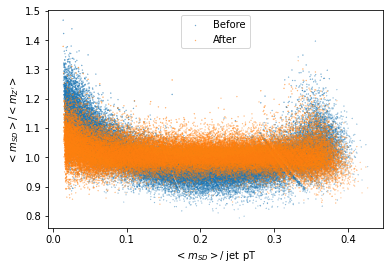

In [15]:
fig, ax = plt.subplots()

mname = "msoftdrop"
msdhists = out[mname]
title = titles[mname]

# flavor, pt, mass, eta, msdratio
hnum = msdhists["mean"][::sum, :, :, :, window]
hden = msdhists["massmean"][::sum, :, :, :, window]

mask = (hnum.counts() > 10)
msdgrid = np.where(mask, hnum.values(), massgrid)
msdcorr = np.ones_like(msdgrid)
msdcorr[mask] = hden.values()[mask] / hnum.values()[mask]
msdcorrw = np.zeros_like(msdgrid)
msdcorrw[mask] = 1 / ( msdcorr[mask] * np.sqrt(hnum.variances()[mask]) / hnum.values()[mask] )

x = rgrid
ax.scatter(
    x[mask],
    msdcorr[mask],
    s=1/msdcorrw[mask],
    label="Before",
)

if "cmean" in msdhists:
    hcnum = msdhists["cmean"][::sum, :, :, :, window]
    ax.scatter(
        x[mask],
        hden.values()[mask] / hcnum.values()[mask],
        s=1/msdcorrw[mask],
        label="After",
    )
ax.set_ylabel("$<m_{SD}> / <m_{Z'}>$")
ax.set_xlabel("$<m_{SD}> /$ jet pT")
ax.legend()
#fig.savefig("before_after.pdf")
fig.savefig("before_after_msdPT_2018.png")

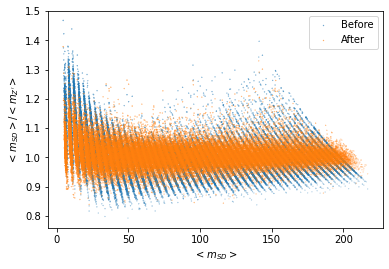

In [16]:
fig, ax = plt.subplots()

mname = "msoftdrop"
msdhists = out[mname]
title = titles[mname]

# flavor, pt, mass, eta, msdratio
hnum = msdhists["mean"][::sum, :, :, :, window]
hden = msdhists["massmean"][::sum, :, :, :, window]

mask = (hnum.counts() > 10)
msdgrid = np.where(mask, hnum.values(), massgrid)
msdcorr = np.ones_like(msdgrid)
msdcorr[mask] = hden.values()[mask] / hnum.values()[mask]
msdcorrw = np.zeros_like(msdgrid)
msdcorrw[mask] = 1 / ( msdcorr[mask] * np.sqrt(hnum.variances()[mask]) / hnum.values()[mask] )

x = msdgrid
ax.scatter(
    x[mask],
    msdcorr[mask],
    s=1/msdcorrw[mask],
    label="Before",
)

if "cmean" in msdhists:
    hcnum = msdhists["cmean"][::sum, :, :, :, window]
    ax.scatter(
        x[mask],
        hden.values()[mask] / hcnum.values()[mask],
        s=1/msdcorrw[mask],
        label="After",
    )
ax.set_ylabel("$<m_{SD}> / <m_{Z'}>$")
ax.set_xlabel("$<m_{SD}>$")
ax.legend()
#fig.savefig("before_after_sdm.pdf")
fig.savefig("before_after_sdm_2018.png")

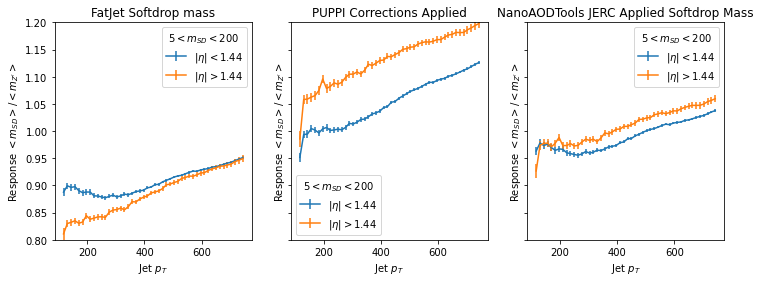

In [17]:
def plresp(hnum, hden, ax, **pl):
    resp = hnum.values() / hden.values()
    # denom is negligible
    resp_var = hnum.variances() / hden.values()**2
    eb = ax.errorbar(
        x=hnum.axes[0].centers,
        y=resp,
        yerr=np.sqrt(resp_var),
        **pl,
    )
    return eb


fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor="w")

for ax, (mname, title) in zip(axes, titles.items()):
    msdhists = out[mname]
    ax.set_title(title)

    # flavor, pt, mass, eta, msdratio
    hnum = msdhists["mean"][::sum, :, 10j:200j:sum, -1.44j:1.44j:sum, window]
    hden = msdhists["massmean"][::sum, :, 10j:200j:sum, -1.44j:1.44j:sum, window]
    plresp(hnum, hden, ax, label="$|\eta| < 1.44$")

    hnum = (
        msdhists["mean"][::sum, :, 10j:200j:sum, :-1.44j:sum, window]
        + msdhists["mean"][::sum, :, 10j:200j:sum, 1.44j::sum, window]
    )
    hden = (
        msdhists["massmean"][::sum, :, 10j:200j:sum, :-1.44j:sum, window]
        + msdhists["massmean"][::sum, :, 10j:200j:sum, 1.44j::sum, window]
    )
    plresp(hnum, hden, ax, label="$|\eta| > 1.44$")

    ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
    ax.set_xlabel(hnum.axes[0].label)
    ax.legend(title="$5 < m_{SD} < 200$")
    ax.set_ylim(0.8, 1.2)
    
fig.savefig("response_2018.png")
    

(0.9, 1.2)

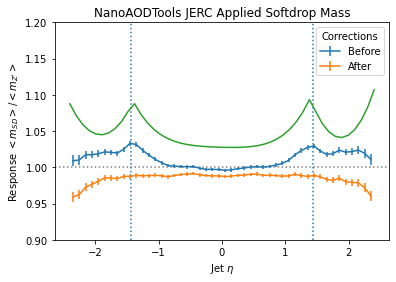

In [18]:
fig, ax = plt.subplots(facecolor="w")
mname = "msoftdrop"
msdhists = out[mname]
title = titles[mname]
ax.set_title(title)

pt, msd = slice(120j, 1000j, sum), slice(10j, 200j, sum)
# flavor, pt, mass, eta, msdratio
hden = msdhists["massmean"][::sum, pt, msd, :, window]

hnum = msdhists["mean"][::sum, pt, msd, :, window]
plresp(hnum, hden, ax, label="Before")

hnum = msdhists["cmean"][::sum, pt, msd, :, window]
plresp(hnum, hden, ax, label="After")

ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
ax.set_xlabel(hnum.axes[0].label)
ax.legend(title="Corrections")
ax.axvline(-1.44, linestyle=":")
ax.axvline(1.44, linestyle=":")
ax.axhline(1, linestyle=":", color="grey")

etas = np.linspace(-2.4, 2.4, 48)
ax.plot(etas, 1/MSDProc().corrs["msoftdrop"].evaluate(100/800, np.log(800), etas))

ax.set_ylim(0.9, 1.2)

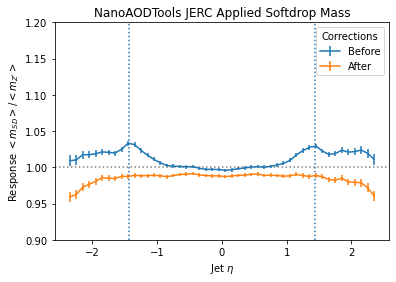

In [19]:
fig, ax = plt.subplots(facecolor="w")
mname = "msoftdrop"
msdhists = out[mname]
title = titles[mname]
ax.set_title(title)

pt, msd = slice(120j, 1000j, sum), slice(10j, 200j, sum)
# flavor, pt, mass, eta, msdratio
hden = msdhists["massmean"][::sum, pt, msd, :, window]

hnum = msdhists["mean"][::sum, pt, msd, :, window]
plresp(hnum, hden, ax, label="Before")

hnum = msdhists["cmean"][::sum, pt, msd, :, window]
plresp(hnum, hden, ax, label="After")

ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
ax.set_xlabel(hnum.axes[0].label)
ax.legend(title="Corrections")
ax.axvline(-1.44, linestyle=":")
ax.axvline(1.44, linestyle=":")
ax.axhline(1, linestyle=":", color="grey")

etas = np.linspace(-2.4, 2.4, 48)
#ax.plot(etas, 1/MSDProc().corrs["msoftdrop"].evaluate(100/800, np.log(800), etas))

ax.set_ylim(0.9, 1.2)
fig.savefig("Before_After_eta_jec_2018.png")

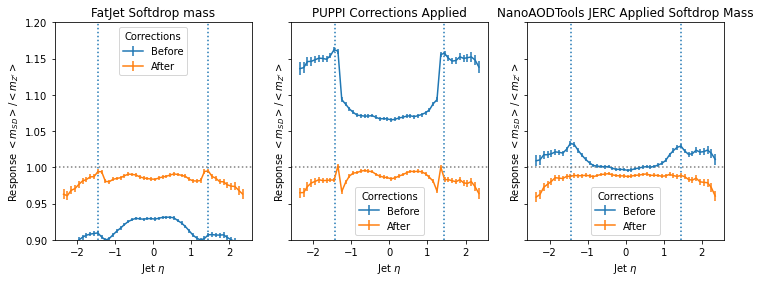

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor="w")

for ax, mname in zip(axes, titles):
    msdhists = out[mname]
    title = titles[mname]
    ax.set_title(title)
    
    ptwindow = slice(120j, 1000j, sum)
    masswindow = slice(10j, 200j, sum)

    # flavor, pt, mass, eta, msdratio
    hden = msdhists["massmean"][::sum, ptwindow, masswindow, :, window]

    hnum = msdhists["mean"][::sum, ptwindow, masswindow, :, window]
    plresp(hnum, hden, ax, label="Before")

    hnum = msdhists["cmean"][::sum, ptwindow, masswindow, :, window]
    plresp(hnum, hden, ax, label="After")

    ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
    ax.set_xlabel(hnum.axes[0].label)
    ax.legend(title="Corrections")
    ax.axvline(-1.44, linestyle=":")
    ax.axvline(1.44, linestyle=":")
    ax.axhline(1, linestyle=":", color="grey")
    ax.set_ylim(0.9, 1.2)
fig.savefig("Before_After_eta_2018.png")

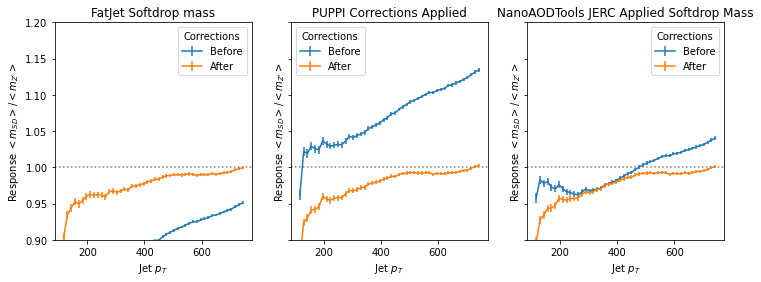

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor="w")

for ax, mname in zip(axes, titles):
    msdhists = out[mname]
    title = titles[mname]
    ax.set_title(title)
    
    ptwindow = slice(120j, 1000j, sum)
    masswindow = slice(10j, 200j, sum)

    # flavor, pt, mass, eta, msdratio
    hden = msdhists["massmean"][::sum, :, 10j:200j:sum, -2.4j:2.4j:sum, window]

    hnum = msdhists["mean"][::sum, :, 10j:200j:sum, -2.4j:2.4j:sum, window]
    plresp(hnum, hden, ax, label="Before")

    hnum = msdhists["cmean"][::sum, :, 10j:200j:sum, -2.4j:2.4j:sum, window]
    plresp(hnum, hden, ax, label="After")

    ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
    ax.set_xlabel(hnum.axes[0].label)
    ax.legend(title="Corrections")
    ax.axhline(1, linestyle=":", color="grey")
    ax.set_ylim(0.9, 1.2)
fig.savefig("Before_After_pt_2018.png")

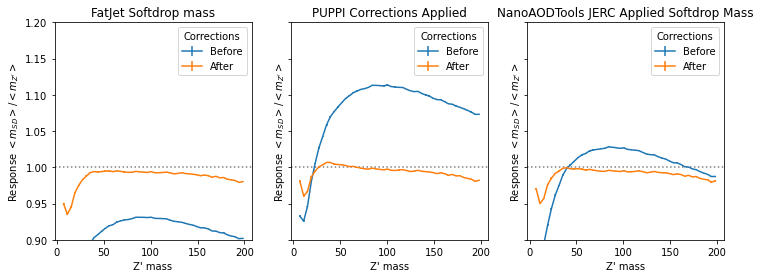

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor="w")

for ax, mname in zip(axes, titles):
    msdhists = out[mname]
    title = titles[mname]
    ax.set_title(title)
    
    ptwindow = slice(120j, 1000j, sum)
    masswindow = slice(10j, 200j, sum)

    # flavor, pt, mass, eta, msdratio
    hden = msdhists["massmean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]

    hnum = msdhists["mean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]
    plresp(hnum, hden, ax, label="Before")

    hnum = msdhists["cmean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]
    plresp(hnum, hden, ax, label="After")

    ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
    ax.set_xlabel(hnum.axes[0].label)
    ax.legend(title="Corrections")
    ax.axhline(1, linestyle=":", color="grey")
    ax.set_ylim(0.9, 1.2)
    fig.savefig("Before_After_zmass_2018.png")

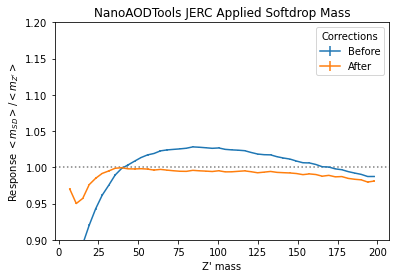

In [23]:
fig, ax = plt.subplots(facecolor="w")
mname = "msoftdrop"
msdhists = out[mname]
title = titles[mname]
ax.set_title(title)

ptwindow = slice(120j, 1000j, sum)
masswindow = slice(10j, 200j, sum)

# flavor, pt, mass, eta, msdratio
hden = msdhists["massmean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]

hnum = msdhists["mean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]
plresp(hnum, hden, ax, label="Before")

hnum = msdhists["cmean"][::sum, ptwindow, :, -2.4j:2.4j:sum, window]
plresp(hnum, hden, ax, label="After")

ax.set_ylabel("Response $<m_{SD}> / <m_{Z'}>$")
ax.set_xlabel(hnum.axes[0].label)
ax.legend(title="Corrections")
ax.axhline(1, linestyle=":", color="grey")
ax.set_ylim(0.9, 1.2)
fig.savefig("Before_After_zmass_jec_2018.png")

In [24]:
def addrhos(ax):
    ptval = np.linspace(0, 1024+512, 20)
    mval = 0.8 * ptval / 2
    ax.plot(ptval, mval, linestyle="--", color="r", label="AK8 cone")
    mval = np.exp(-2.0/2)*ptval
    ax.plot(ptval, mval, linestyle="--", color="k", label=r"$\rho=-2.0$")
    mval = np.exp(-7.0/2)*ptval
    ax.plot(ptval, mval, linestyle=":", color="k", label=r"$\rho=-7.0$")

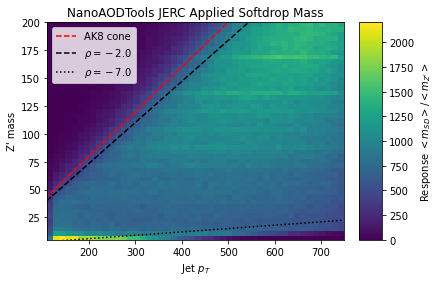

In [25]:
fig, ax = plt.subplots(facecolor="w")

ax.set_title(title)

# flavor, pt, mass, eta, msdratio
hnum = msdhists["mean"][::sum, :, :, ::sum, window]
hden = msdhists["massmean"][::sum, :, :, ::sum, window]

art = hist.Hist(
    *hnum.axes,
    data=hnum.counts(), #hnum.values() / hden.values(),
).plot(ax=ax)#, vmin=0.9, vmax=1.1)
art.cbar.set_label("Response $<m_{SD}> / <m_{Z'}>$")

addrhos(ax)
ax.legend(loc="upper left")

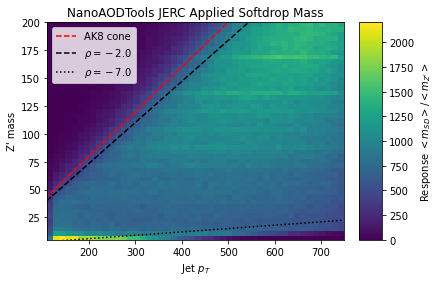

In [26]:
fig, ax = plt.subplots(facecolor="w")

ax.set_title(title)

# flavor, pt, mass, eta, msdratio
hnum = msdhists["mean"][::sum, :, :, ::sum, window]
hden = msdhists["massmean"][::sum, :, :, ::sum, window]

art = hist.Hist(
    *hnum.axes,
    data=hnum.counts(), #hnum.values() / hden.values(),
).plot(ax=ax)#, vmin=0.9, vmax=1.1)
art.cbar.set_label("Response $<m_{SD}> / <m_{Z'}>$")

addrhos(ax)
ax.legend(loc="upper left")

In [27]:
#fig, ax = plt.subplots(facecolor="w")

#mn = "particleNet_mass"
#ax.set_title(titles[mn])

# flavor, pt, mass, eta, msdratio
#hnum = out[mn]["mean"][::sum, :, :, ::sum, window]
#hden = out[mn]["massmean"][::sum, :, :, ::sum, window]
#ax.set_title(titles[mn])


#avg = hnum.sum().value / hden.sum().value
#art = hist.Hist(
#    *hnum.axes,
#    data=hnum.values() / hden.values(),
#).plot(ax=ax, cmap="bwr", vmin=0.8, vmax=1.2)
#art.cbar.set_label("Response $<m_{SD}> / <m_{Z'}>$" + f" (avg {avg:.2f})")
# art.cbar.set_label(f"Response diff (vs. unity)")

#addrhos(ax)

#ax.legend(loc="upper left")

In [28]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, facecolor="w")

#mn = "particleNet_mass"
#ax.set_title(titles[mn])

#fnames = {0: "light jets", 1: "c jets", 2: "b jets"}

#for i, (ax, flavor) in enumerate(zip(axes, fnames)):
#    hnumf = out[mn]["mean"][flavor, :, :, ::sum, window]
#    hdenf = out[mn]["massmean"][flavor, :, :, ::sum, window]
#    ax.set_title(titles[mn] + ", " + fnames[flavor])

#    avg = hnumf.sum().value / hdenf.sum().value
#    art = hist.Hist(
#        *hnum.axes,
#        data=hnumf.values() / hdenf.values(),
#    ).plot(ax=ax, cmap="bwr", vmin=0.8, vmax=1.2, cbar=False if i < 2 else True)
#    if i == 2:
#        art.cbar.set_label("Response $<m_{SD}> / <m_{Z'}>$")


#    addrhos(ax)
#    ax.legend(loc="upper left")

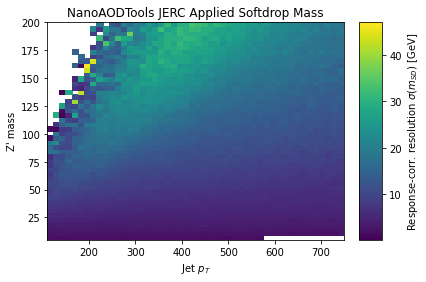

In [29]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots(facecolor="w")

mn = "msoftdrop"
ax.set_title(titles[mn])

# flavor, pt, mass, eta, msdratio
hmean = out[mn]["cmean"][::sum, :, :, ::sum, window]

art = hist.Hist(
    *hmean.axes,
    data=err(hmean),
).plot(ax=ax, cmin=0, cmax=50)
art.cbar.set_label("Response-corr. resolution $\sigma(m_{SD})$ [GeV]")

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


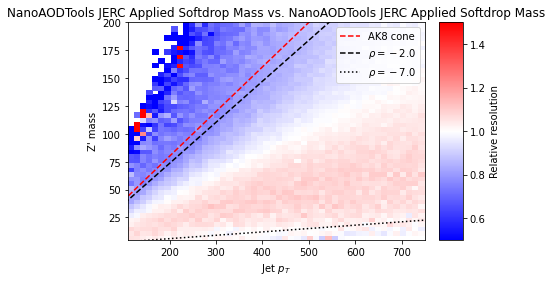

In [30]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots(facecolor="w")

mn2 = "msoftdrop"
#mn2 = "msoftdrop"
# mn2 = "msdraw"
# mn2 = "particleNet_mass"
ax.set_title(titles[mn2] + " vs. " + titles[mn])

# flavor, pt, mass, eta, msdratio
hmean2 = out[mn2]["mean"][::sum, :, :, ::sum, window]

art = hist.Hist(
    *hmean.axes,
    data=(err(hmean2) / err(hmean)) * (hmean.values() / hmean2.values()),
).plot(ax=ax, cmap="bwr", vmin=0.5, vmax=1.5)
art.cbar.set_label("Relative resolution")

addrhos(ax)
ax.legend()

/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/users/h2/akobert/coffea/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


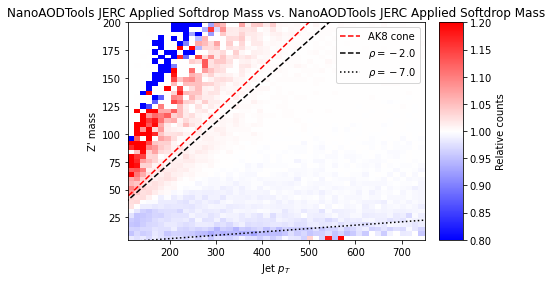

In [31]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots(facecolor="w")

mn2 = "msoftdrop"
# mn2 = "msoftdrop"
#mn2 = "msdraw"
#mn2 = "particleNet_mass"
ax.set_title(titles[mn2] + " vs. " + titles[mn])

# flavor, pt, mass, eta, msdratio
hmean2 = out[mn2]["mean"][::sum, :, :, ::sum, window]

art = hist.Hist(
    *hmean.axes,
    data=hmean2.counts() / hmean.counts(),
).plot(ax=ax, cmap="bwr", vmin=0.8, vmax=1.2)
art.cbar.set_label("Relative counts")

addrhos(ax)
ax.legend()